In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples = 10000, n_classes = 2, n_features = 3, n_redundant = 0, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

lr = LogisticRegression()
lr.fit(X_train, y_train)


print(X_train.shape, X_test.shape)


(6000, 3) (4000, 3)


# Performance Measures


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, plot_confusion_matrix

In [21]:
accuracy_score(y_test, lr.predict(X_test), normalize = True) # accuracy, number (or porportion) predition is right

# this is not good measure if there is imbalnaced dataset, high accuracy doesnt mean anything

0.87175

f1_score(y_test, lr.predict(X_test)) # f1 on the other hand is pretty good

## Confusion Matrix


| TN | FN |
|----|----|
| FP | TP |


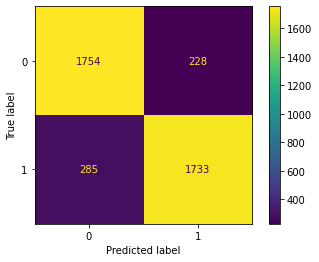

In [35]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Precision / Recall / F1

Precision is a measure on how well we predict correct positive, minimising false positives. 

$Precision = \frac{TP}{TP + FP}$

Recall is how many positive that we have detected, maximising detections

$Recall = \frac{TP}{TP + FN}$

Precision and Recall are usually trade offs, when tring to predict and capture all positives (reduce false negatives), we will not be able to avoid false positives.

F1 is the *harmonic mean* of precision and recall. 

$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2\times \frac{precision\times recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}$

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score


ps = precision_score(y_test, lr.predict(X_test))
rs = recall_score(y_test, lr.predict(X_test))
f1 = f1_score(y_test, lr.predict(X_test))

print(ps, rs, f1)


print(lr.decision_function(X_test[:5])) # decision function generate a score based on 
                                        # input then can set cutoff based on requirement by default threshold is 0
print(y_test[:5])

0.8837327893931668 0.8587710604558969 0.8710731339532546
[ 1.79989551 -6.02435198  1.14559077  1.88161862  0.64926345]
[1 0 1 1 1]


In [43]:
1733/(1733+228) # Precision

0.8837327893931668

In [46]:
1733/(1733+285) # Recall

0.8587710604558969

In [41]:
cm

array([[1754,  228],
       [ 285, 1733]])

In [42]:
len(y_test)

4000

In [95]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(lr, X_train, y_train, cv = 3, method = "decision_function") # get all the scores

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

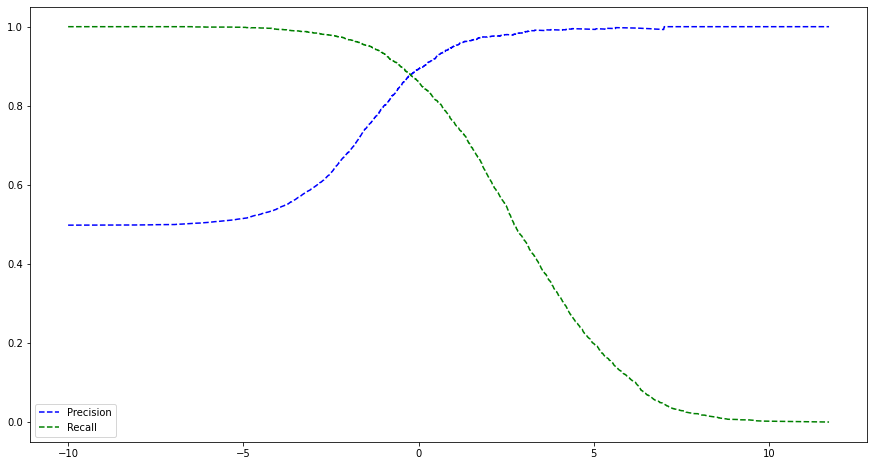

In [96]:
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((15, 8))
    ax.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    ax.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    ax.legend()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

## Plot Precision vs Recall


-0.9809962193698533 is the threshold of getting 80% precision and 0.9317497490799599 recall


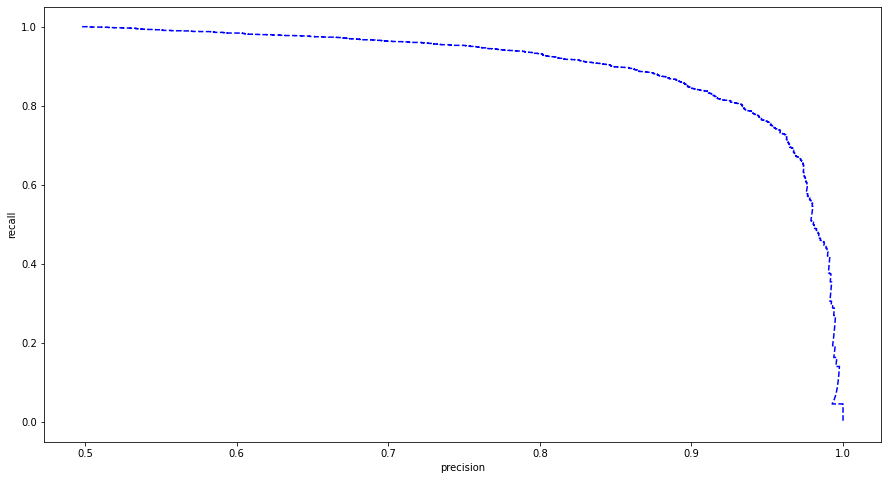

In [92]:
import numpy as np

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((15, 8))
ax.plot(precisions[:-1], recalls[:-1], "b--")
ax.set_xlabel("precision")
ax.set_ylabel("recall")

# if we want to set the precition to 80% for a reasonable recall
precision_80, recall_at_80_precision = thresholds[np.argmax(precisions >= 0.8)], recalls[np.argmax(precisions >= 0.8)]

print(f"{precision_80} is the threshold of getting 80% precision and {recall_at_80_precision} recall")

## Receiver Operating Characteristic (ROC)

It plots TPR (True Positive Rate) vs FPR (False Positive Rate). FPR is ration of negative instance misclassified as positive. It is 1 - TNR. TNR is specificity. ROS curve plots sensitivity (recall) versus 1 - specificity

See chart, higher TPR, higher FPR. Diagonal line represent a random classifier, good model should be above and as far away as possible

Area under the curve (AOC) is 1 for a perfect model.

In [93]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

Text(0, 0.5, 'TPR')

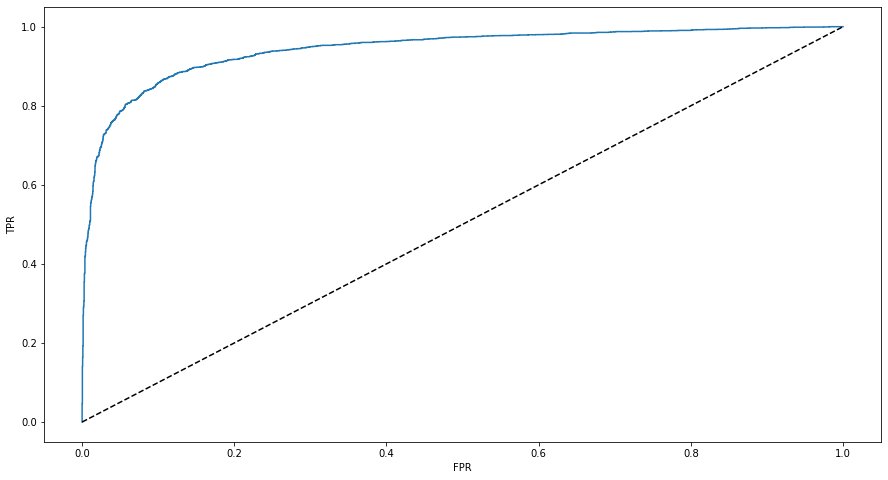

In [99]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((15, 8))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--') #diagonal
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
